In [1]:
from google.colab import drive
# drive.mount('/content/gdrive',force_remount=True)
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/42028-DL-CNN-2020/Ass2/

/content/gdrive/My Drive/42028-DL-CNN-2020/Ass2


In [3]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator



import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
base_path="/content/gdrive/My Drive/42028-DL-CNN-2020/Ass2/"
dataset_path=os.path.join(base_path,"17FlowerDataset")
file = open(os.path.join(dataset_path,"17Flowers-GroundTruth.txt"),"rb")
data_set=np.zeros(1361, dtype="int")
df_headers=["index","fileName","label"]

label_dict = {"Daffodil":0,"Snowdrop":1,"LilyValley":2,"Bluebell":3,"Crocus":4,"Iris":5,
             "Tigerlily":6,"Tulip":7,"Fritillary":8,"Sunflower":9,"Daisy":10,
             "ColtsFoot":11,"Dandelion":12,"Cowslip":13,"Buttercup":14,"Windflower":15,"Pansy":16}
label_list = ["Daffodil","Snowdrop","LilyValley","Bluebell","Crocus","Iris",
             "Tigerlily","Tulip","Fritillary","Sunflower","Daisy",
             "ColtsFoot","Dandelion","Cowslip","Buttercup","Windflower","Pansy"]

for line in file:
  line= line.decode("utf-8")
  image_range=re.findall(r"image_[0]*([0-9]+)",line)
  if(len(image_range)==0):
    continue;
  label=re.search(r"([A-Za-z]+)",line).group(0)
  from_idx=int(image_range[0])
  to_idx=int(image_range[1])
  data_set[from_idx:to_idx+1]=label_dict[label]

idx_set = np.array(range(1361))
filename_set = np.array([os.path.join(dataset_path,"{}/image_{:04d}.jpg".format(label_list[idx],val))
                         for (val,idx) in enumerate(data_set)])

data_set=np.concatenate((filename_set.reshape(-1,1),data_set.reshape(-1,1)),axis=1)
data_set= np.concatenate((idx_set.reshape(-1,1),data_set),axis=1)

file.close()

In [5]:
# data_set[0] is useless
pd.DataFrame(data_set[1:],columns=df_headers)

,index,fileName,label
0,1,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,0
1,2,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,0
2,3,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,0
3,4,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,0
4,5,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,0
...,...,...,...
1355,1356,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,16
1356,1357,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,16
1357,1358,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,16
1358,1359,/content/gdrive/My Drive/42028-DL-CNN-2020/Ass...,16


In [6]:
data_set[1][1]

'/content/gdrive/My Drive/42028-DL-CNN-2020/Ass2/17FlowerDataset/Daffodil/image_0001.jpg'

The Image Size is (499, 635, 3)


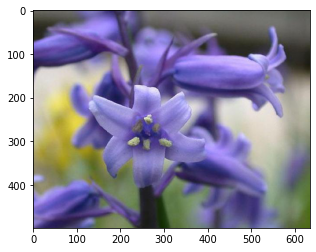

In [7]:
# img = plt.imread(data_set[220][1])
img = plt.imread("/content/gdrive/My Drive/42028-DL-CNN-2020/Ass2/17FlowerDataset/Bluebell/image_0241.jpg")

print("The Image Size is {}".format(np.shape(img)))
plt.imshow(img)

In [0]:
split_idx_set=[{"Train":[],"Val":[],"Test":[]},
               {"Train":[],"Val":[],"Test":[]},
               {"Train":[],"Val":[],"Test":[]}]
for j in range(3):
  for i in split_idx_set[j].keys():
    file=open(os.path.join(dataset_path,"{}Set{}.txt".format(i,j+1)),"rb")

    for line in file:
      line=line.decode("utf-8")
      idx=re.findall(r"image_[0]*([0-9]+)",line)[0]
      split_idx_set[j][i].append(int(idx))

selected_split=0

train_set = np.array([data_set[i] for i in split_idx_set[selected_split]["Train"]])
val_set = np.array([data_set[i] for i in split_idx_set[selected_split]["Val"]])
test_set = np.array([data_set[i] for i in split_idx_set[selected_split]["Test"]])

train_df = pd.DataFrame(train_set,columns=df_headers)
val_df = pd.DataFrame(val_set,columns=df_headers)
test_df = pd.DataFrame(test_set,columns=df_headers)

In [9]:
%cd {base_path}

/content/gdrive/My Drive/42028-DL-CNN-2020/Ass2


## Transfer Learning: ResNet50

In [10]:
from keras.applications.resnet50 import ResNet50
from keras.applications import InceptionV3

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import keras

from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import HTML, display, clear_output, SVG

import math

Using TensorFlow backend.


In [0]:

res_conv=InceptionV3(weights="imagenet",include_top=False,input_shape=(224,224,3))
# res_conv = VGG16(weights="imagenet",include_top=False, input_shape=(150, 150, 3))
res_model= keras.models.Sequential()
res_model.add(res_conv)
res_model.add(keras.layers.Flatten())
res_model.add(keras.layers.Dense(6400, activation="relu"))
res_model.add(keras.layers.Dense(320,activation="relu"))
res_model.add(keras.layers.Dense(17,activation="softmax"))

In [12]:
6400/320,320/17

(20.0, 18.823529411764707)

In [13]:
res_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6400)              327686400 
_________________________________________________________________
dense_2 (Dense)              (None, 320)               2048320   
_________________________________________________________________
dense_3 (Dense)              (None, 17)                5457      
Total params: 351,542,961
Trainable params: 351,508,529
Non-trainable params: 34,432
_________________________________________________________________


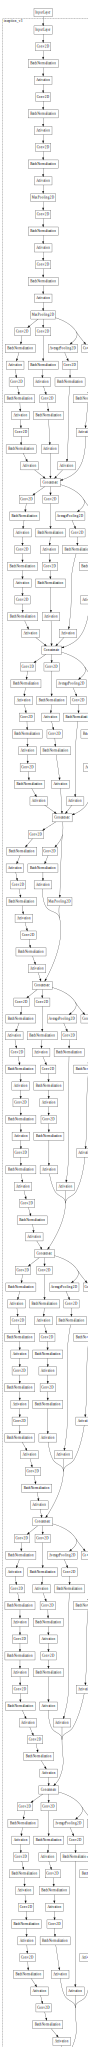

In [14]:
out_path=os.path.join(base_path,"res_model.png")
plot_model(res_model,to_file=out_path,show_layer_names=True,show_shapes=True,rankdir="TB",expand_nested=True)
SVG(model_to_dot(res_model,show_shapes=False,show_layer_names=False,rankdir="TB",expand_nested=True).create(prog="dot",format="svg"))

In [47]:
# train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen=ImageDataGenerator(rescale=1./255,
                rotation_range=10,
                width_shift_range=0.1,  
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1,
                horizontal_flip=True,
                fill_mode='nearest')


train_generator=train_datagen.flow_from_dataframe(
        train_df,
        x_col="fileName",
        y_col="label",
        target_size=(224,224),
        batch_size=170,
        class_mode="categorical")
val_generator=val_datagen.flow_from_dataframe(
        val_df,
        x_col="fileName",
        y_col="label",
        target_size=(224,224),
        batch_size=85,
        class_mode="categorical")
test_generator=test_datagen.flow_from_dataframe(
        test_df,
        x_col="fileName",
        y_col="label",
        target_size=(224,224),
        batch_size=85,
        class_mode="categorical")

Found 680 validated image filenames belonging to 17 classes.
Found 340 validated image filenames belonging to 17 classes.
Found 340 validated image filenames belonging to 17 classes.


In [0]:
def show_datagen(df):
  df_size=np.array(df).shape[0]
  idx=np.random.randint(df_size,size=1)[0]
  img_path=np.array(df)[idx][1]
  sample=mpimg.imread(img_path)
  sample=np.expand_dims(sample,0)
  it =train_datagen.flow(sample,batch_size=1)
  plt.figure(figsize=(15,15))
  # print(np.shape(it))
  plt.subplot(3,3,1)
  plt.imshow(sample[0])
  plt.title("Original {} Image".format(label_list[int(np.array(df)[idx][2])]))
  for i in range(8):
    plt.subplot(3,3,i+2)
    # generate batch of images
    batch=it.next()
    # convert to unsigned integers for viewing
    # image = batch[0].astype('uint8')
    image=batch[0]
    # plot raw pixel data
    plt.imshow(image)
    plt.title("Generated Image {}".format(i+1))

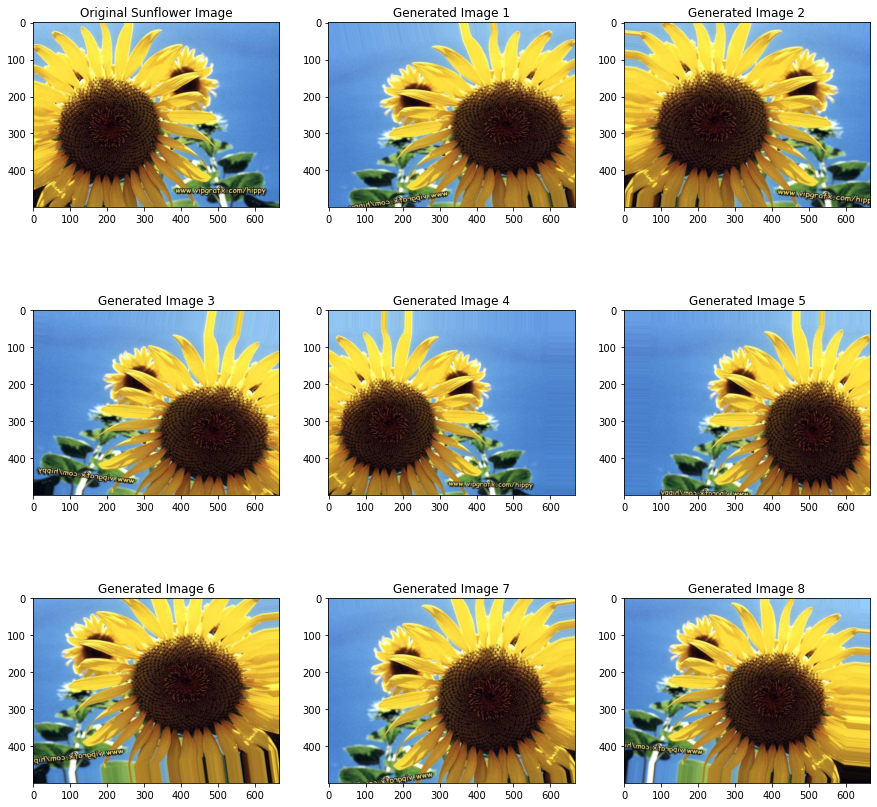

In [17]:
show_datagen(test_df)

In [0]:
def show_distribution(df):
  dis=np.zeros(17,dtype="int")
  for row in np.array(df):
    dis[int(row[2])]+=1
  return dis
  # sns.distplot(dis,bins=17)

In [19]:
show_distribution(val_df)

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

In [0]:
from tensorflow.keras.optimizers import RMSprop


In [0]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=40, # 4 steps for each epoch, decay every 10 epoch
    decay_rate=0.70,
    staircase=True)

In [0]:
res_model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  metrics=['acc'])

In [0]:
def learningrate_descent(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.70
    epochs_drop = 10
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [23]:
print([0.01*0.7**i for i in range(int(50/10))])

[0.01, 0.006999999999999999, 0.0049, 0.003429999999999999, 0.0024009999999999995]


In [0]:
ckpt_path="/content/gdrive/My Drive/42028-DL-CNN-2020/Ass2/res_checkpoint.hdf5"
save_ckpt=ModelCheckpoint(ckpt_path,monitor="val_loss",save_best_only=True,mode="min")
# lr_descent=LearningRateScheduler(learningrate_descent,verbose=1)

In [38]:
history=res_model.fit_generator(
    train_generator,
    steps_per_epoch=4, # 680 train images/10 batch= 68
    epochs=10,
    validation_data=val_generator,
    validation_steps=4, #340 val images/10 batch = 34
    callbacks=[save_ckpt]
)


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


ResourceExhaustedError: ignored

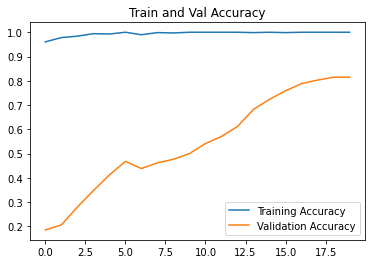

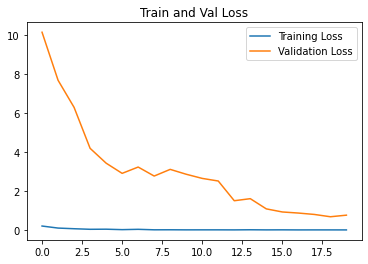

In [0]:
train_acc=history.history["acc"]
val_acc=history.history["val_acc"]
num_epochs=len(train_acc)
plt.figure()
plt.plot(range(num_epochs),train_acc,label="Training Accuracy")
plt.plot(range(num_epochs),val_acc,label="Validation Accuracy")
plt.title("Train and Val Accuracy")
plt.legend()

train_loss=history.history["loss"]
val_loss=history.history["val_loss"]
plt.figure()
plt.plot(range(num_epochs),train_loss,label="Training Loss")
plt.plot(range(num_epochs),val_loss,label="Validation Loss")
plt.title("Train and Val Loss")
plt.legend()

In [40]:
load_model=tf.keras.models.load_model(ckpt_path)

print(history.history)

NameError: ignored

In [0]:
res_model.predict_generator(test_generator,4)

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


## Transfer Learning: VGG16

In [0]:
from keras.applications import VGG16
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import keras
vgg_conv=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
vgg_model= keras.models.Sequential()
vgg_model.add(vgg_conv)
vgg_model.add(keras.layers.Flatten())
vgg_model.add(keras.layers.Dense(256,activation="relu"))
vgg_model.add(keras.layers.Dense(17,activation="softmax"))

In [0]:
val_datagen=ImageDataGenerator(rescale=1./255)

train_datagen=ImageDataGenerator(rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')


train_generator=train_datagen.flow_from_dataframe(
        train_df,
        x_col="fileName",
        y_col="label",
        target_size=(224,224),
        batch_size=20,
        class_mode="categorical")
val_generator=val_datagen.flow_from_dataframe(
        val_df,
        x_col="fileName",
        y_col="label",
        target_size=(224,224),
        batch_size=10,
        class_mode="categorical")

NameError: ignored

In [0]:
vgg_model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['acc'])

In [0]:
ckpt_path="/content/gdrive/My Drive/42028-DL-CNN-2020/Ass2/vgg_checkpoint.hdf5"
save_ckpt=ModelCheckpoint(ckpt_path,monitor="val_loss",save_best_only=True,mode="min")

In [0]:
history=vgg_model.fit_generator(
    train_generator,
    steps_per_epoch=68, # 680 train images/10 batch= 68
    epochs=20,
    validation_data=val_generator,
    validation_steps=34, #340 val images/10 batch = 34
    callbacks=[save_ckpt]
)

Epoch 1/20
68/68 [==============================] - 347s 5s/step - loss: 3.4111 - acc: 0.0566 - val_loss: 2.8618 - val_acc: 0.0441
Epoch 2/20
68/68 [==============================] - 30s 442ms/step - loss: 2.8344 - acc: 0.0500 - val_loss: 2.8266 - val_acc: 0.0500
Epoch 3/20
68/68 [==============================] - 30s 443ms/step - loss: 2.8337 - acc: 0.0529 - val_loss: 2.8356 - val_acc: 0.0647
Epoch 4/20
68/68 [==============================] - 30s 437ms/step - loss: 2.8336 - acc: 0.0485 - val_loss: 2.8351 - val_acc: 0.0529
Epoch 5/20
68/68 [==============================] - 30s 440ms/step - loss: 2.8336 - acc: 0.0529 - val_loss: 2.8355 - val_acc: 0.0618
Epoch 6/20
68/68 [==============================] - 30s 436ms/step - loss: 2.8336 - acc: 0.0529 - val_loss: 2.8317 - val_acc: 0.0559
Epoch 7/20
68/68 [==============================] - 29s 432ms/step - loss: 2.8335 - acc: 0.0588 - val_loss: 2.8343 - val_acc: 0.0441
Epoch 8/20
68/68 [==============================] - 29s 432ms/step - lo